In [1]:
%run -i 'functions.py'
%run -i 'encode_csv.py'

Using TensorFlow backend.


In [2]:
covtype = pd.read_csv('../datasets/covtype.data')

In [4]:
len(covtype)

581011

In [14]:
covtype.head()

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [27]:
# check if the first one is an ID column. It is not.
len(np.unique(covtype.iloc[:,0]))

1978

In [15]:
covtype.columns

Index(['2596', '51', '3', '258', '0', '510', '221', '232', '148', '6279', '1',
       '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10',
       '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '1.1', '0.32', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '5'],
      dtype='object')

Qua spiega il significato delle varie colonne: https://www.kaggle.com/uciml/forest-cover-type-dataset
L'ultima è la classificazione in 7 tipi diversi di alberi.

In [16]:
print('Classifications: from ', min(covtype['5']), 'to ', max(covtype['5']))

Classifications: from  1 to  7


In [3]:
X = covtype.drop(['5'], axis=1) 
le = LabelEncoder().fit(covtype['5']) 
y = le.transform(covtype['5'])

# encode data
encoded, encoders = number_encode_features(X)

# scale columns between -1 and 1
X = scale_columns(X)

X.head()

,2596,51,3,258,0,510,221,232,148,6279,...,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42
0,-0.184775,-0.276825,-0.183390,-0.041108,-0.067725,-0.275418,0.030921,0.045989,0.033353,0.591763,...,-0.044175,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506
1,-0.077722,-0.046269,-0.077329,-0.001022,0.024007,0.116601,0.086039,0.057800,-0.029639,0.577264,...,-0.044175,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506
2,-0.087227,-0.001825,0.059035,-0.019634,0.092482,0.103955,0.101787,0.057800,-0.080820,0.589811,...,-0.044175,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506
3,-0.182274,-0.307381,-0.183390,-0.083342,-0.061265,-0.275277,0.030921,0.042052,0.029416,0.584374,...,-0.044175,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506
4,-0.190278,-0.065714,-0.122784,0.021884,-0.079353,-0.320802,0.070291,0.053863,-0.009954,0.564717,...,-0.044175,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print("train:", len(X_train), ", test:", len(X_test))

# taking a subset

# n = 5000 
# X_train = X_train[:n]
# y_train = y_train[:n]
# X_test = X_test[:n//10]
# y_test = y_test[:n//10]

print("train:", len(X_train), ", test:", len(X_test))

train: 464808 , test: 116203
train: 464808 , test: 116203



using gamma= 0.1

nystroem svm fitting

 40 / 100 samples

 50 / 100 samples

 60 / 100 samples

 70 / 100 samples

 80 / 100 samples

 90 / 100 samples

 100 / 100 samples

fourier svm fitting

 40 / 100 samples

 50 / 100 samples

 60 / 100 samples

 70 / 100 samples

 80 / 100 samples

 90 / 100 samples

 100 / 100 samples

kernel svm fitting

linear svm fitting


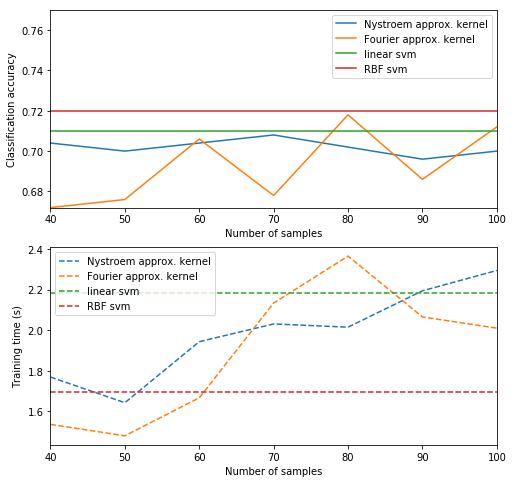

In [10]:
covtype_fit = fit_all(X_train, y_train, X_test, y_test, scale_samples=10)
plot_results(covtype_fit)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print("train:", len(X_train), ", test:", len(X_test))

# taking a subset

n = 8000 
X_train = X_train[:n]
y_train = y_train[:n]
X_test = X_test[:n//10]
y_test = y_test[:n//10]

print("train:", len(X_train), ", test:", len(X_test))

train: 464808 , test: 116203
train: 8000 , test: 800



using gamma= 0.01

nystroem svm fitting

 30 / 300 samples

 60 / 300 samples

 90 / 300 samples

 120 / 300 samples

 150 / 300 samples

 180 / 300 samples

 210 / 300 samples

 240 / 300 samples

 270 / 300 samples

 300 / 300 samples

fourier svm fitting

 30 / 300 samples

 60 / 300 samples

 90 / 300 samples

 120 / 300 samples

 150 / 300 samples

 180 / 300 samples

 210 / 300 samples

 240 / 300 samples

 270 / 300 samples

 300 / 300 samples

kernel svm fitting

linear svm fitting


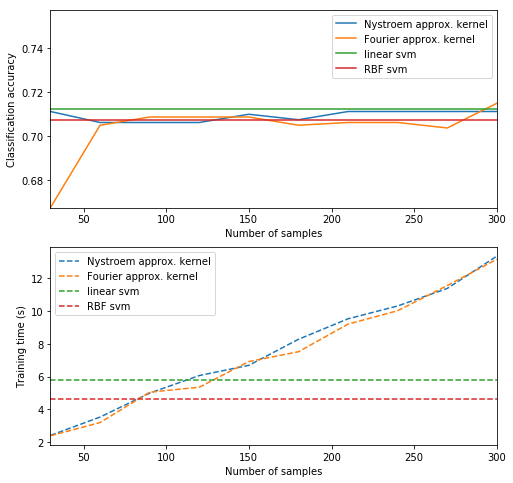

In [50]:
covtype_fit = fit_all(X_train, y_train, X_test, y_test)
plot_results(covtype_fit)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print("train:", len(X_train), ", test:", len(X_test))

# taking a subset

n = 16000 
X_train = X_train[:n]
y_train = y_train[:n]
X_test = X_test[:n//10]
y_test = y_test[:n//10]

print("train:", len(X_train), ", test:", len(X_test))

train: 464808 , test: 116203
train: 16000 , test: 1600



using gamma= 0.01

nystroem svm fitting

 11 / 88 samples

 22 / 88 samples

 33 / 88 samples

 44 / 88 samples

 55 / 88 samples

 66 / 88 samples

 77 / 88 samples

 88 / 88 samples

fourier svm fitting

 11 / 88 samples

 22 / 88 samples

 33 / 88 samples

 44 / 88 samples

 55 / 88 samples

 66 / 88 samples

 77 / 88 samples

 88 / 88 samples

kernel svm fitting

linear svm fitting


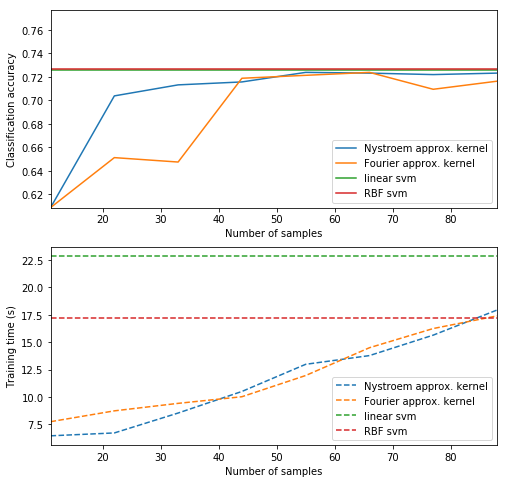

In [12]:
covtype_fit = fit_all(X_train, y_train, X_test, y_test, scale_samples=11)
plot_results(covtype_fit)

Questo risultati significa che i dati sono già linearmente separabili nell'input space, ed è il motivo per cui rbf e linear hanno la stessa accuratezza. La cosa è plausibile perché ho 54 colonne, quindi lo spazio è parecchio grande. In compenso i due metodi sono molto più rapidi (ovviamente).

### Mando qualche job adesso..

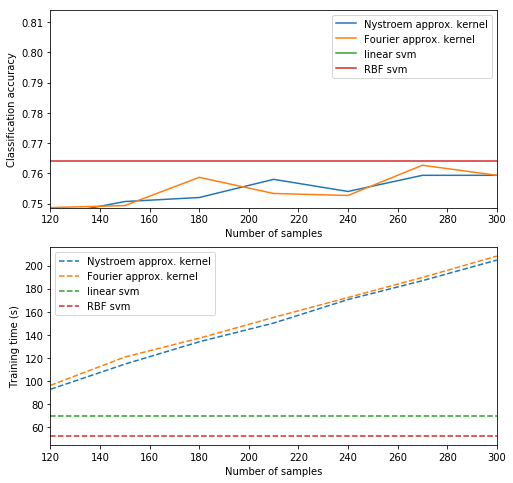

In [3]:
job_results = pickle.load(open('pickle/covtype_fit_30000_galileo.pickle','rb'))
plot_results(job_results)

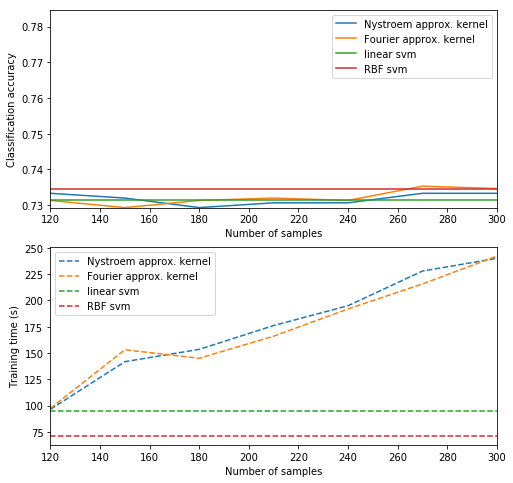

In [5]:
job_results = pickle.load(open('pickle/covtype_fit_30000_marconi.pickle','rb'))
plot_results(job_results)

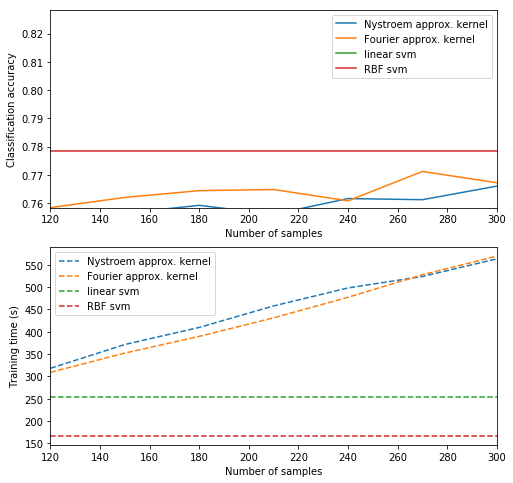

In [4]:
job_results = pickle.load(open('pickle/covtype_fit_50000.pickle','rb'))
plot_results(job_results)

In realtà va bene, ma la finestra di samples è sbagliata... devo rifare

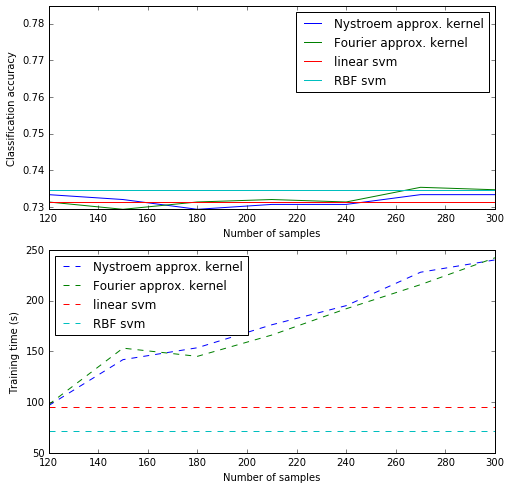

In [3]:
# Marconi covtype 30000 e 50000
# 1673734 bdw_all_s covtype. gcarbone  R      15:12      1 r000u09l04

job_results = pickle.load(open('pickle/covtype_fit_30000_marconi.pickle','rb'))
plot_results(job_results)

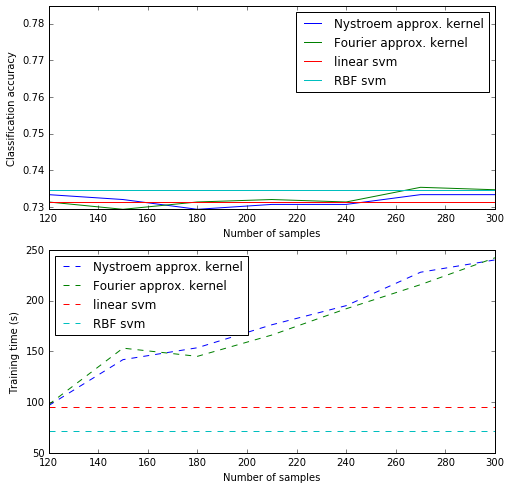

In [4]:
job_results = pickle.load(open('pickle/covtype_fit_30000_marconi.pickle','rb'))
plot_results(job_results)

In [3]:
# rimandato quello da 50000 su Marconi con finestra da 10-100, controllare...
%run -i 'functions.py'
job_results = pickle.load(open('pickle/covtype_fit_50000_marconi_2.pickle','rb'))

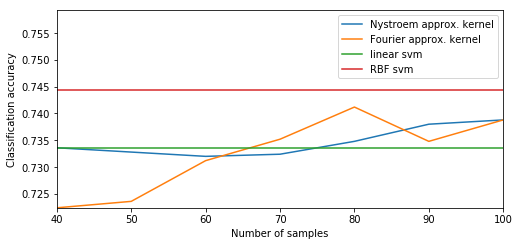

In [5]:
plot_accuracy(job_results)

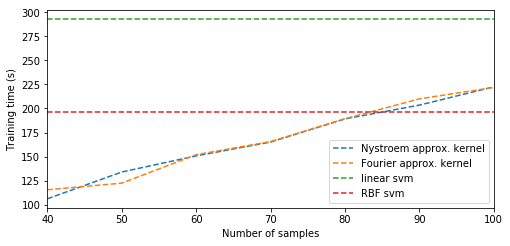

In [8]:
%run -i 'functions.py'
plot_timescale(job_results)

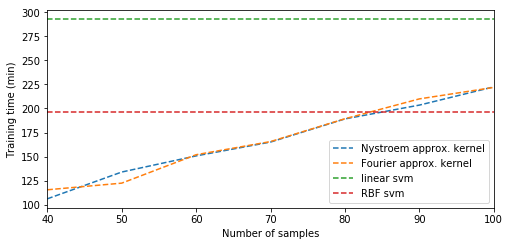

In [10]:
fit = job_results

sample_sizes = fit['sample_sizes']

kernel = fit['kernel']
linear = fit['linear']
nystroem = fit['nystroem']
fourier = fit['fourier']

kernel_svm_time = kernel['time']
linear_svm_time = linear['time']
nystroem_times = nystroem['times']
fourier_times = fourier['times']

# plot the results
plt.figure(figsize=(8, 8))

timescale = plt.subplot(212)

timescale.plot(sample_sizes, nystroem_times, '--', label='Nystroem approx. kernel')
timescale.plot(sample_sizes, fourier_times, '--', label='Fourier approx. kernel')
timescale.plot([sample_sizes[0], sample_sizes[-1]],
               [linear_svm_time, linear_svm_time], '--', label='linear svm')
timescale.plot([sample_sizes[0], sample_sizes[-1]],
               [kernel_svm_time, kernel_svm_time], '--', label='RBF svm')
timescale.set_xlim(sample_sizes[0], sample_sizes[-1])
timescale.set_xlabel("Number of samples")
timescale.set_ylabel("Training time (min)")
timescale.legend(loc='best')

## PCA

In [5]:
# plotly

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA

from sklearn import svm, pipeline
from sklearn.kernel_approximation import (RBFSampler,Nystroem)
from sklearn import datasets

############################################################


n = 2000
X = X_train[:n]
y = y_train[:n]


###########################################################

n_components=3

X1, X2 = np.linspace(-0.5, 0.5, 30), np.linspace(-0.5, 0.5, 30)
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T

start = time()
pca = PCA(n_components).fit(X)
pca_time = time() - start
X_pca = pca.transform(X)

gamma = 0.1
kpca = KernelPCA(kernel="rbf", n_components=n_components, fit_inverse_transform=False, gamma=gamma)
start = time()
kpca = kpca.fit(X)
kpca_time = time() - start
X_kpca = kpca.transform(X)

fourier = RBFSampler(gamma=gamma, random_state=1, n_components=50)
fourier_pca = pipeline.Pipeline([("feature_map", fourier),("pca", PCA(n_components))])
start = time()
fourier_pca.fit(X)
fourier_time = time() - start
X_fourier_pca = fourier_pca.transform(X)


nystroem = Nystroem(gamma=gamma, random_state=1, n_components=50)
nystroem_pca = pipeline.Pipeline([("feature_map", nystroem),("pca", PCA(n_components))])
start = time()
nystroem_pca.fit(X)
nystroem_time = time() - start
X_nystroem_pca = nystroem_pca.transform(X)

In [6]:
pca_explained_var = np.var(X_pca, axis=0)
pca_explained_var_ratio = pca_explained_var / np.sum(pca_explained_var)


kpca_explained_var = np.var(X_kpca, axis=0)
kpca_explained_var_ratio = kpca_explained_var / np.sum(kpca_explained_var)

foupca_explained_var = np.var(X_fourier_pca, axis=0)
foupca_explained_var_ratio = foupca_explained_var / np.sum(foupca_explained_var)


nyspca_explained_var = np.var(X_nystroem_pca, axis=0)
nyspca_explained_var_ratio = nyspca_explained_var / np.sum(nyspca_explained_var)

print("\n\nExplained variance\n")
#  is simply the variance of the components.
print("PCA:          ", pca_explained_var)
print("Kernel PCA:   " ,kpca_explained_var)
print("Fourier PCA:  ",foupca_explained_var)
print("Nystroem PCA: ",nyspca_explained_var)

print("\n\nExplained variance ratio\n")
print("PCA:          ", pca_explained_var_ratio)
print("Kernel PCA:   " ,kpca_explained_var_ratio)
print("Fourier PCA:  ",foupca_explained_var_ratio)
print("Nystroem PCA: ",nyspca_explained_var_ratio)

print("\n\nExplained variance percentage\n")
# cumulative proportion explained variance (often useful in selecting components and estimating the dimensionality 
# of your space):
print("PCA:          ", np.cumsum(pca_explained_var_ratio))
print("Kernel PCA:   " ,np.cumsum(kpca_explained_var_ratio))
print("Fourier PCA:  ",np.cumsum(foupca_explained_var_ratio))
print("Nystroem PCA: ",np.cumsum(nyspca_explained_var_ratio))



Explained variance

PCA:           [0.54386773 0.15094334 0.12321936]
Kernel PCA:    [0.07976386 0.023307   0.01891128]
Fourier PCA:   [0.09827849 0.03120449 0.030245  ]
Nystroem PCA:  [0.07847781 0.02095514 0.01588342]


Explained variance ratio

PCA:           [0.66485025 0.18452044 0.15062931]
Kernel PCA:    [0.65389786 0.19106897 0.15503317]
Fourier PCA:   [0.61528666 0.1953602  0.18935314]
Nystroem PCA:  [0.68054353 0.18171873 0.13773774]


Explained variance percentage

PCA:           [0.66485025 0.84937069 1.        ]
Kernel PCA:    [0.65389786 0.84496683 1.        ]
Fourier PCA:   [0.61528666 0.81064686 1.        ]
Nystroem PCA:  [0.68054353 0.86226226 1.        ]
